In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

%matplotlib inline

# Consumo de bebidas álcoolicas ao redor do mundo
   #### Fonte: https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption

In [2]:
df = pd.read_csv('drinks.csv')
df.head() # pequena amostra de dados

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [3]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### Média

In [4]:
df.median()

beer_servings                   76.0
spirit_servings                 56.0
wine_servings                    8.0
total_litres_of_pure_alcohol     4.2
dtype: float64

### Variância

In [5]:
df.var()

beer_servings                   10229.927191
spirit_servings                  7794.119765
wine_servings                    6351.707200
total_litres_of_pure_alcohol       14.237779
dtype: float64

#### Amostra dos dados (60)

In [6]:
sample = df[df['beer_servings'] != 0].sample(60)
sample

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
16,Belgium,295,84,212,10.5
105,Malta,149,100,120,6.6
129,Palau,306,63,23,6.9
85,Japan,77,202,16,7.0
146,Samoa,105,18,24,2.6
156,Slovenia,270,51,276,10.6
96,Liberia,19,152,2,3.1
66,Ghana,31,3,10,1.8
139,Moldova,109,226,18,6.3
69,Guatemala,53,69,2,2.2


### Coeficiente de variação de oferta de cerveja

In [7]:
md = sample.get('beer_servings').mean()
S = sample.get('beer_servings').std()
CV = (S / md)*100
print(f'Variação de {CV}%')

Variação de 89.08495041082358%


In [8]:
N = sample['beer_servings'].count() # número de elementos
#K = int(1 + 3.3 * np.log(N)) # número de classes, usando a regra de Sturges
K = 5
AT = max(sample['beer_servings']) - min(sample['beer_servings']) # Amplitude total
H = int(AT / K) # Amplitude de classe

In [9]:
# Funções de cálculo de acúmulo de frequência
def accumulatedFrequencySimple(mass):
    acc = 0
    f = []
    for n in mass:
        acc += n
        f.append(acc)
    return f

def accumulatedFrequencyPerc(mass):
    acc = 0
    f = []
    for n in mass:
        acc += n * 100
        f.append(acc)
    return f

In [10]:
freqs = sample.get('beer_servings').value_counts()
values = freqs.values
size = sample.get('beer_servings').size
accRelFreqs = accumulatedFrequencySimple(values)
relFreqs = [n / size for n in values]
percFreqs = [x * 100 for x in relFreqs]
accPercFreqs = accumulatedFrequencyPerc(relFreqs)

## Tabela de distribuição dos dados

In [11]:
distribution_table = pd.DataFrame({'xi': freqs.keys(),
                                   'fi': values,
                                   'Fi': accRelFreqs,
                                   'fi%': percFreqs,
                                   'Fi%': accPercFreqs})
distribution_table

,xi,fi,Fi,fi%,Fi%
0,31,3,3,5.000000,5.000000
1,1,2,5,3.333333,8.333333
2,32,2,7,3.333333,11.666667
3,6,2,9,3.333333,15.000000
4,9,2,11,3.333333,18.333333
5,77,2,13,3.333333,21.666667
6,149,2,15,3.333333,25.000000
7,52,1,16,1.666667,26.666667
8,51,1,17,1.666667,28.333333
9,306,1,18,1.666667,30.000000


## Tabela de distribuição agrupada em classes

In [12]:
#Calculando rol e classes

rol = sorted(freqs.keys())
classes = [(rol[0], rol[0]+H)]
for i in range(rol[0]+H, rol[-1], H):
    classes.append((i, i+H))

if len(classes) > K:
    classes = classes[:-1]
    cl = classes[-1]
    classes[-1] = (cl[0], rol[-1])


freqsClasses = []
def calcClassFreqs(mass, classes):
    f = []
    for cl in classes:
        c = 0
        for n in mass:
            if cl == classes[-1]:
                if cl[0] <= n <= cl[1]:
                    c += 1
            else:
                if cl[0] <= n < cl[1]:
                    c += 1
        f.append(c)
    return f

# Calculando campos de frequência
v = sample.get('beer_servings').values
classFreqs = calcClassFreqs(v, classes)
accClassFreqs = accumulatedFrequencySimple(classFreqs)
percClassFreqs = [n / size for n in classFreqs]
accPercClassFreqs = accumulatedFrequencyPerc(percClassFreqs)
table_d = pd.DataFrame({'#Classe': [x+1 for x in range(len(classes))],
                       'Xi': [f'{x[0]} {"|—|" if x == classes[-1] else "|—"} {x[1]}' for x in classes],
                       'fi': classFreqs,
                       'Fi': accClassFreqs,
                       'fi%': [x*100 for x in percClassFreqs],
                       'Fi%': accPercClassFreqs})
                        
table_d

,#Classe,Xi,fi,Fi,fi%,Fi%
0,1,1 |— 70,27,27,45.000000,45.000000
1,2,70 |— 139,16,43,26.666667,71.666667
2,3,139 |— 208,6,49,10.000000,81.666667
3,4,208 |— 277,7,56,11.666667,93.333333
4,5,277 |—| 346,4,60,6.666667,100.000000


### Histograma da tabela de distribuição

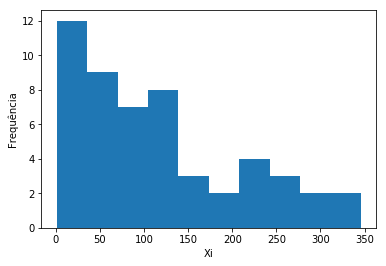

In [13]:
plt.hist(rol)
plt.xlabel('Xi')
plt.ylabel('Frequência')
plt.show()

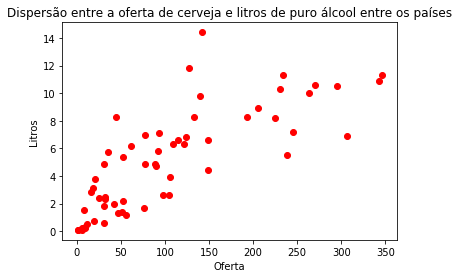

In [14]:
plt.scatter(sample.get('beer_servings'), sample.get('total_litres_of_pure_alcohol'), c ='r')
plt.title('Dispersão entre a oferta de cerveja e litros de puro álcool entre os países')
plt.xlabel('Oferta')
plt.ylabel('Litros')
plt.show()

## Correlação
### oferta de cerveja X litros de puro álcool consumido por cada país

In [15]:
sample.get('beer_servings').corr(sample.get('total_litres_of_pure_alcohol'))
# 0.7 < c < 0.9 = correlação forte

0.7819820451102232

## Regressão Linear

In [35]:
x_reg = sample.get('beer_servings').values.reshape(-1,1)
y_reg = sample.get('total_litres_of_pure_alcohol').values.reshape(-1,1)

model = linear_model.LinearRegression()
model.fit(x_reg, y_reg)
y_pred = model.predict(x_reg)

a, b = model.coef_[0][0], model.intercept_[0]
print(f'a = {a}') # Inclinação da linha de tendência
print(f'b = {b}') # Ponto onde a linha de tendência atinge o eixo Y

a = 0.03063911923945414
b = 1.8845653899765473


### Equação da reta

In [38]:
print(f'{a}X + {b}')

0.03063911923945414X + 1.8845653899765473


#### Visualização da regressão

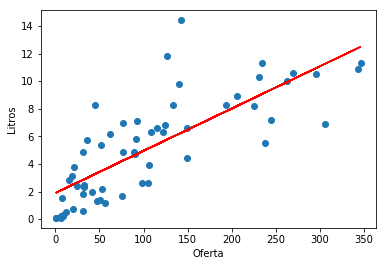

In [39]:
plt.scatter(x_reg, y_reg)
plt.plot(x_reg,y_pred,color='r')
plt.ylabel('Litros')
plt.xlabel('Oferta')
plt.show()